Project Completed by **Ahmed Salama**
* [GitHub](https://github.com/ahmedsalama00)
* [Linked In](https://www.linkedin.com/in/ahmedsalamaa00/)
* [My Portfolio ](https://ahmedsalama00.github.io/Ahmed)
* [Titanic Survival Predection Repo](https://github.com/ahmedsalama00/Titanic-Predection)


## Titanic Survival Predection

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## Data Collecting

In [270]:
df1=pd.read_csv("titanic_test.csv")
df2=pd.read_csv("titanic_train.csv")
df= pd.concat([df1, df2], ignore_index=True)

In [271]:
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [272]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [273]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      4
dtype: int64

## Missing Values Handling

In [274]:
df['Age']=df["Age"].replace(np.nan,df["Age"].mode()[0])

In [275]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    4
dtype: int64

In [276]:
df["Age"]=df["Age"].astype(int)

In [277]:
df["Embarked"]=df["Embarked"].replace(np.nan,df["Embarked"].mode()[0])

In [278]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1782 non-null   int64  
 1   Pclass    1782 non-null   int64  
 2   Sex       1782 non-null   object 
 3   Age       1782 non-null   int64  
 4   SibSp     1782 non-null   int64  
 5   Parch     1782 non-null   int64  
 6   Fare      1782 non-null   float64
 7   Embarked  1782 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 111.5+ KB


In [280]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000,1782.000000
mean,0.383838,2.308642,29.345679,0.523008,0.381594,32.204208
std,0.486456,0.835836,13.024554,1.102434,0.805831,49.679476
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [281]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [282]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [283]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age           int64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [284]:
#young (0-18)","adult(18-30)","middle aged(30-50)","old (50-100)
df["Age"]=pd.cut(x=df["Age"],bins=[0,18,30,50,100],labels=["young","adult","middle aged","old"])

In [285]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,adult,1,0,7.2500,S
1,1,1,0,middle aged,1,0,71.2833,C
2,1,3,0,adult,0,0,7.9250,S
3,1,1,0,middle aged,1,0,53.1000,S
4,0,3,1,middle aged,0,0,8.0500,S
5,0,3,1,adult,0,0,8.4583,Q
6,0,1,1,old,0,0,51.8625,S
7,0,3,1,young,3,1,21.0750,S
8,1,3,0,adult,0,2,11.1333,S
9,1,2,0,young,1,0,30.0708,C


In [286]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         14
SibSp        0
Parch        0
Fare         0
Embarked     0
dtype: int64

In [287]:
df = df.dropna()

In [289]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Exploratory Data Analysis

C:\Users\1\AppData\Local\Temp\ipykernel_21424\42431764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, ax=ax[0,0], palette='Set1')
C:\Users\1\AppData\Local\Temp\ipykernel_21424\42431764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, ax=ax[0,1], palette='Set1')
C:\Users\1\AppData\Local\Temp\ipykernel_21424\42431764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, ax=ax[0,2], palette='Set1')
C:\Users\1\AppData\Local\Temp\ipykernel_21424\42431764.py:5: FutureWarning

<Axes: xlabel='Fare', ylabel='Count'>

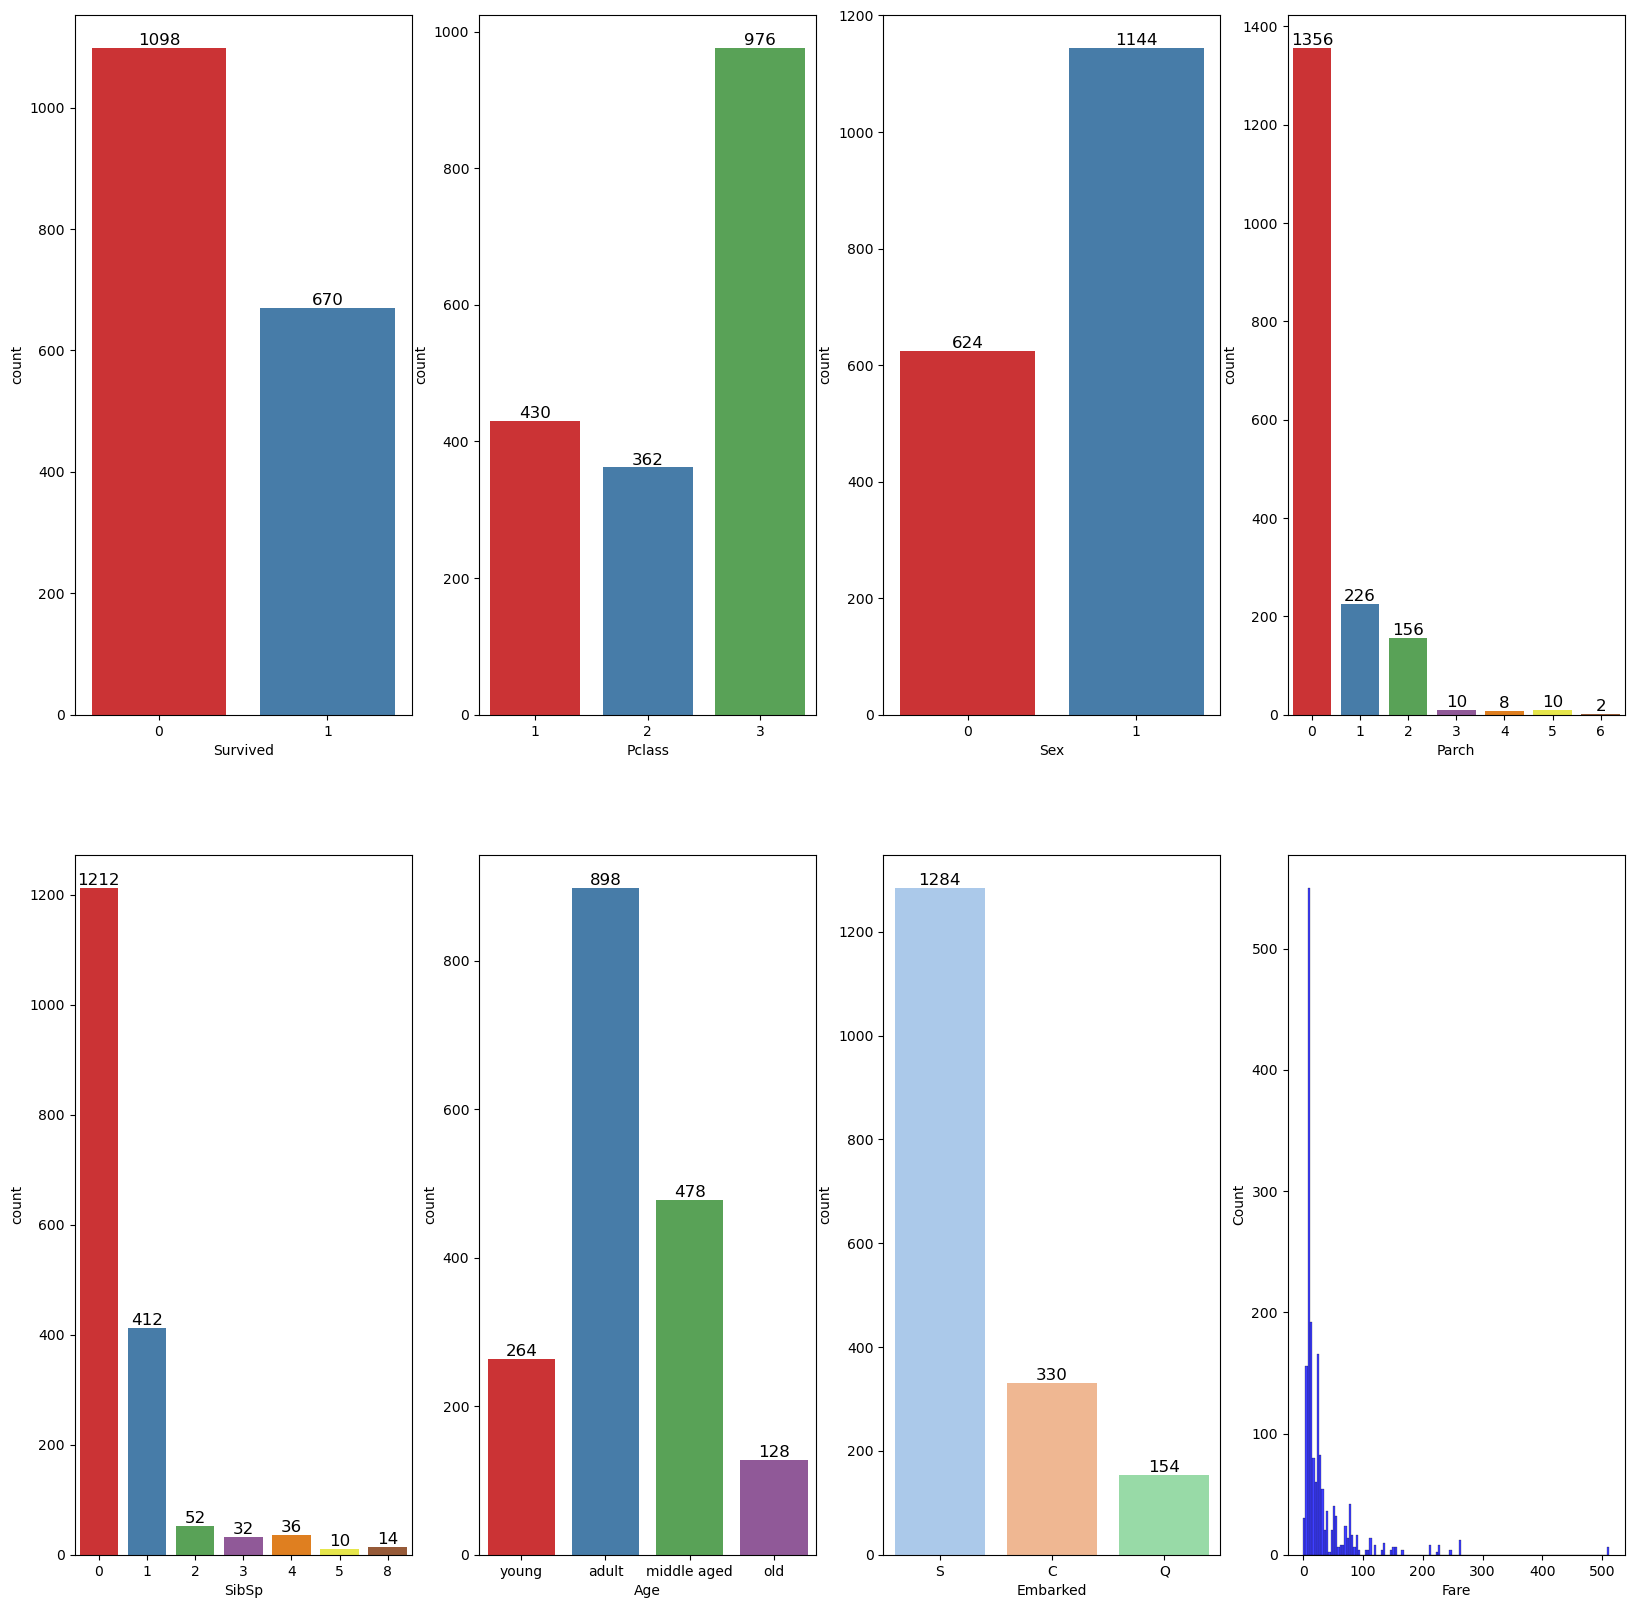

In [290]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x='Survived', data=df, ax=ax[0,0], palette='Set1')
sns.countplot(x='Pclass', data=df, ax=ax[0,1], palette='Set1')
sns.countplot(x='Sex', data=df, ax=ax[0,2], palette='Set1')
sns.countplot(x='Parch', data=df, ax=ax[0,3], palette='Set1')
sns.countplot(x='SibSp', data=df, ax=ax[1,0], palette='Set1')
sns.countplot(x='Age', data=df, ax=ax[1,1], palette='Set1')
sns.countplot(x='Embarked', data=df, ax=ax[1,2], palette='pastel')
for i in range(2):
    for j in range(4):
        for container in ax[i, j].containers:
            ax[i, j].bar_label(container, fontsize=12)
sns.histplot(x='Fare', data=df, ax=ax[1,3], color='blue')


<Axes: xlabel='Pclass', ylabel='Survived'>

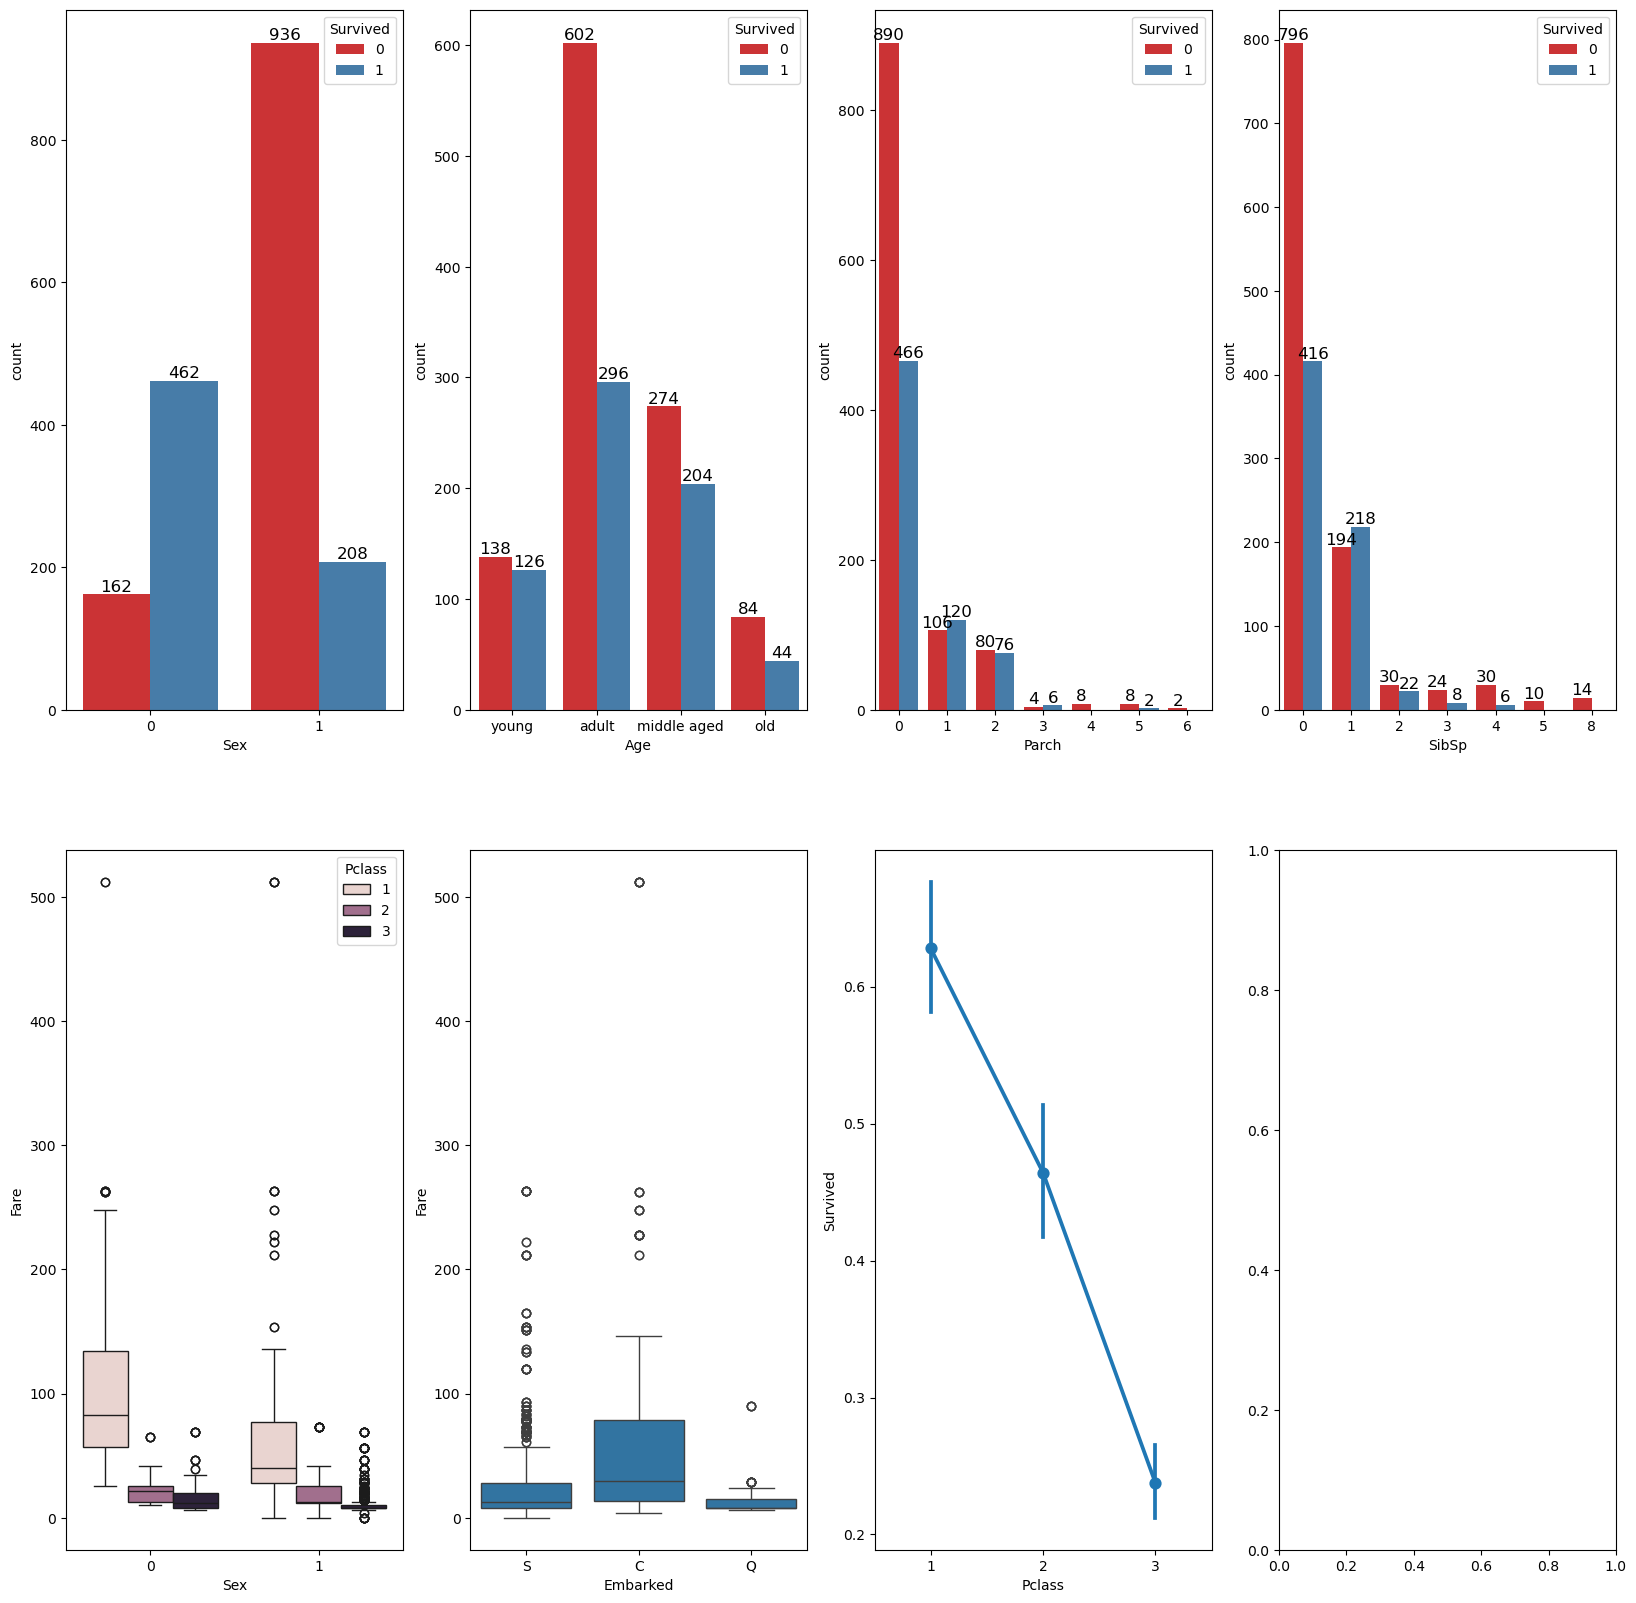

In [291]:
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.countplot(x='Sex', data=df, hue="Survived", ax=ax[0,0], palette='Set1')
sns.countplot(x='Age', data=df, hue="Survived", ax=ax[0,1], palette='Set1')
sns.countplot(x='Parch', data=df, hue="Survived", ax=ax[0,2], palette='Set1')
sns.countplot(x='SibSp', data=df, hue="Survived", ax=ax[0,3], palette='Set1')
for i in range(2):
    for j in range(4):
        for container in ax[i, j].containers:
            ax[i, j].bar_label(container, fontsize=12)
sns.boxplot(x="Sex",y="Fare", data = df,hue="Pclass",ax=ax[1,0])
sns.boxplot(x="Embarked",y="Fare", data = df,ax=ax[1,1])
sns.pointplot(x="Pclass",y="Survived",data=df,ax=ax[1,2])

In [292]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,adult,1,0,7.2500,S
1,1,1,0,middle aged,1,0,71.2833,C
2,1,3,0,adult,0,0,7.9250,S
3,1,1,0,middle aged,1,0,53.1000,S
4,0,3,1,middle aged,0,0,8.0500,S


## Encoding

In [293]:
le.fit(['S','C','Q'])
df['Embarked'] = le.transform(df['Embarked'])

In [296]:
le=LabelEncoder()
le.fit(["young","adult","middle aged","old"])
df['Age'] = le.transform(df['Age'])

In [297]:
# S=0,C=1,Q=2
# young=0,adult=1,middle aged=2,old=3
df.head(7)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0,1,0,7.2500,2
1,1,1,0,1,1,0,71.2833,0
2,1,3,0,0,0,0,7.9250,2
3,1,1,0,1,1,0,53.1000,2
4,0,3,1,1,0,0,8.0500,2
5,0,3,1,0,0,0,8.4583,1
6,0,1,1,2,0,0,51.8625,2


<Axes: >

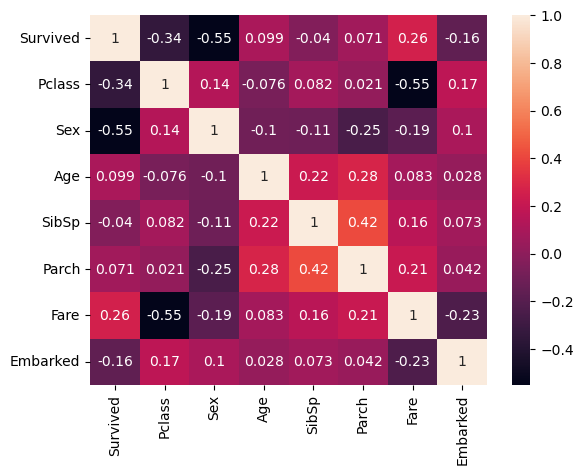

In [299]:
sns.heatmap(df.corr(),annot=True)

## Modeling

In [300]:
y=df["Survived"]
x=df.drop(columns=["Survived"])

In [319]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.2)

In [320]:
LR=LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [321]:
RF=RandomForestClassifier(max_depth=5
                          ,n_estimators=200
                          ,random_state=42)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [322]:
XGB=XGBClassifier(n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42)
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [323]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    y_test_prob=model.predict_proba(X_test)[:,1]

    return{
      "Train accuracy":accuracy_score(y_train,y_train_pred),
      "Test accuracy":accuracy_score(y_test,y_test_pred),
      "Precision":precision_score(y_test,y_test_pred),
      "Recall":recall_score(y_test,y_test_pred),
      "F1":f1_score(y_test,y_test_pred),
      "ROC AUC":roc_auc_score (y_test,y_test_prob)
    }

In [324]:
evaluate_model(LR, X_train, X_test, y_train, y_test)

{'Train accuracy': 0.8012729844413012,
 'Test accuracy': 0.8107344632768362,
 'Precision': 0.7768595041322314,
 'Recall': 0.7014925373134329,
 'F1': 0.7372549019607844,
 'ROC AUC': np.float64(0.853443012211669)}

In [325]:
evaluate_model(RF, X_train, X_test, y_train, y_test)

{'Train accuracy': 0.8451202263083452,
 'Test accuracy': 0.8333333333333334,
 'Precision': 0.8865979381443299,
 'Recall': 0.6417910447761194,
 'F1': 0.7445887445887446,
 'ROC AUC': np.float64(0.9051051560379919)}

In [326]:
evaluate_model(XGB, X_train, X_test, y_train, y_test)

{'Train accuracy': 0.8932107496463932,
 'Test accuracy': 0.8728813559322034,
 'Precision': 0.8739495798319328,
 'Recall': 0.7761194029850746,
 'F1': 0.8221343873517787,
 'ROC AUC': np.float64(0.9263059701492538)}

In [327]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
    plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


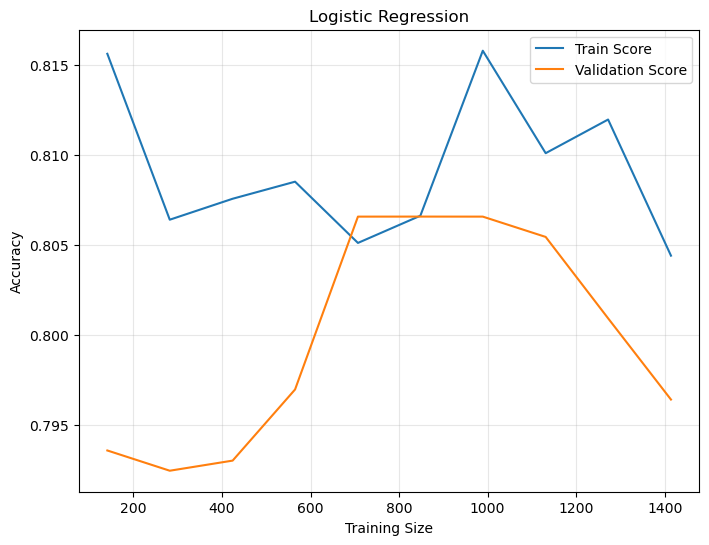

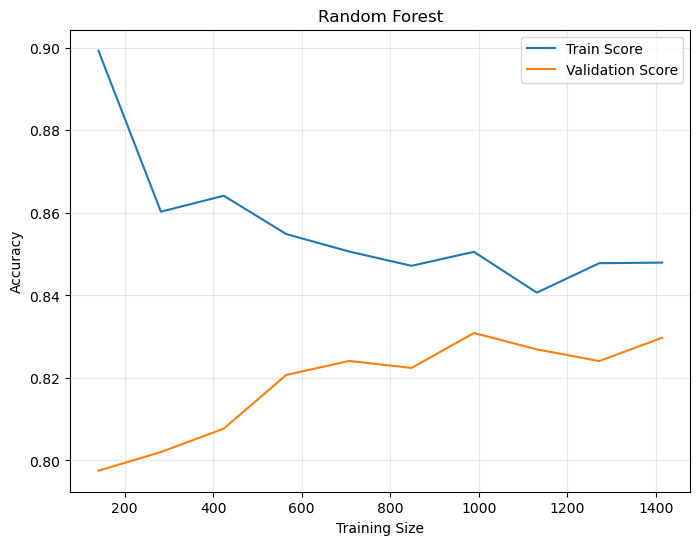

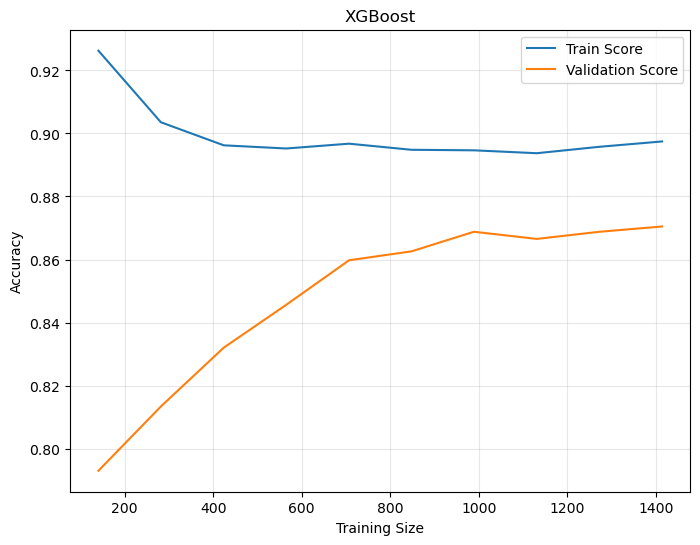

In [330]:
plot_learning_curve(LR, x, y, "Logistic Regression")
plot_learning_curve(RF, x, y, "Random Forest")
plot_learning_curve(XGB, x, y, "XGBoost")


## Based on accuracy, F1-score, and ROC AUC, XGBoost outperformed Logistic Regression and Random Forest, making it the best model for this task.

In [334]:
import joblib
joblib.dump(XGB, "xgboost_model.pkl")

['xgboost_model.pkl']